# **ML Capstone Project - Health Tracker**

By- Kritika Adhikary

# Introduction :
The Medication Effectiveness Dataset hosted on Kaggle provides valuable insights into medication effectiveness across various parameters. This dataset serves as a comprehensive resource for exploring the effectiveness of different medications, factors influencing their efficacy, and related attributes. It's curated to support projects focusing on machine learning, specifically in the domain of medication effectiveness analysis.

## Business Problem Statement
The objective is to enhance a decision-support system that predicts the effectiveness of medications based on patient profiles. By incorporating demographic information, medical history, and allergies, the goal is to aid healthcare professionals in making informed decisions about prescriptions, thereby improving patient outcomes and minimizing adverse drug reactions.

## Dataset Description:
**Patient ID:** Integer representing a unique identifier for each patient.

**Name:** Randomly generated full name.

**Date of Birth:** Date field representing a patient's birthdate (ages range between 1 to 100 years).

**Gender:** Categorical variable ('M' or 'F').

**Medical Conditions:** A list of three randomly selected medical conditions.

**Medications:** A list of three randomly selected medications.

**Allergies:** A list of three randomly selected allergies.

**Last Appointment Date:** Date field representing the last appointment within the last two years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## **Load and Explore the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path= '/content/drive/MyDrive/medical_records.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17


In [5]:
df.isnull().sum()

,0
patient_id,0
name,0
date_of_birth,0
gender,0
medical_conditions,0
medications,0
allergies,0
last_appointment_date,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   patient_id             100000 non-null  int64 
 1   name                   100000 non-null  object
 2   date_of_birth          100000 non-null  object
 3   gender                 100000 non-null  object
 4   medical_conditions     100000 non-null  object
 5   medications            100000 non-null  object
 6   allergies              100000 non-null  object
 7   last_appointment_date  100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [45]:
df['date_of_birth']=pd.to_datetime(df['date_of_birth'])
df['last_appointment_date']=pd.to_datetime(df['last_appointment_date'])

## **Data Cleaning and Preparation**

In [4]:
df['date_of_birth'].dt.year

,date_of_birth
0,1967
1,1977
2,1926
3,1954
4,2015
...,...
99995,1959
99996,1927
99997,1996
99998,1948


In [5]:
dt.date.today().year

2024

In [6]:
df['age']=dt.date.today().year - df['date_of_birth'].dt.year

In [15]:
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9


In [7]:
# Convert necessary columns to datetime
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['last_appointment_date'] = pd.to_datetime(df['last_appointment_date'])

# Feature Engineering: Calculate age from Date of Birth
df['Age'] = (pd.to_datetime('today') - df['date_of_birth']).dt.days // 365

Segregation of patients by age group

In [8]:
df['age_group'] = df['age'].apply(lambda x: 'Minor' if x < 18 else 'Young Adult' if x < 35 else 'Middle Aged' if x < 60 else 'Senior')

Days Since Last Visit

In [9]:
df['days_since_last_visit']=dt.date.today()-df['last_appointment_date'].dt.date

In [10]:
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,Age,age_group,days_since_last_visit
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,57,Middle Aged,"764 days, 0:00:00"
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,47,Middle Aged,"561 days, 0:00:00"
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,98,Senior,"1222 days, 0:00:00"
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,70,Senior,"825 days, 0:00:00"
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,8,Minor,"1199 days, 0:00:00"


In [11]:
df['days_since_last_visit']=df['days_since_last_visit'].apply(lambda x: x.days)

In [12]:
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,Age,age_group,days_since_last_visit
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,57,Middle Aged,764
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,47,Middle Aged,561
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,98,Senior,1222
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,70,Senior,825
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,8,Minor,1199


In [14]:
# segregated patients based on their last vist

df['visit_frquency']=df['days_since_last_visit'].apply(lambda x : "0-200" if x<201 else "201-400" if x<401 else "401-600" if x<601 else "601-800" if x<801 else  ">800")
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,Age,age_group,days_since_last_visit,visit_frquency
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26,57,57,Middle Aged,764,601-800
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14,47,47,Middle Aged,561,401-600
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24,98,98,Senior,1222,>800
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26,70,70,Senior,825,>800
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17,9,8,Minor,1199,>800


In [15]:
df.columns

Index(['patient_id', 'name', 'date_of_birth', 'gender', 'medical_conditions',
       'medications', 'allergies', 'last_appointment_date', 'age', 'Age',
       'age_group', 'days_since_last_visit', 'visit_frquency'],
      dtype='object')

# **EDA ANALYSIS**


1) How is the distribution of ages among patients, and are there specific age groups that are more prevalent in the dataset?

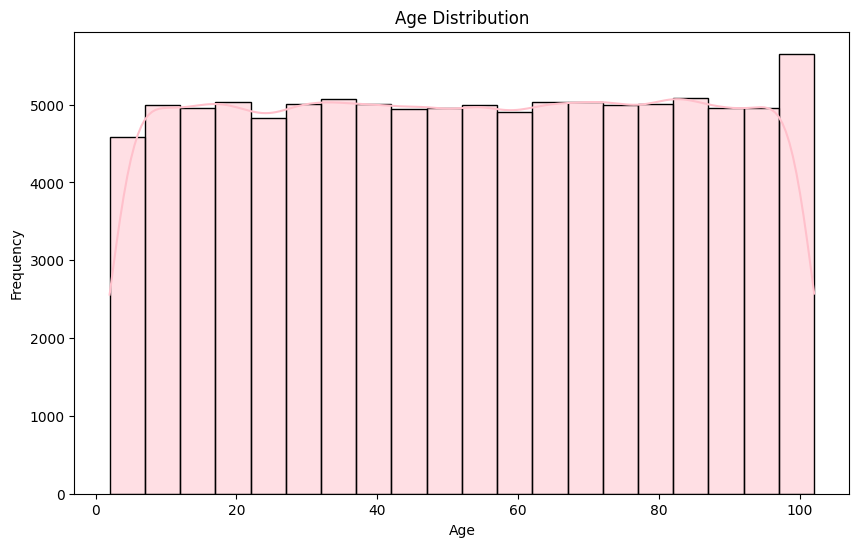

In [41]:
df['Age'] = (pd.to_datetime('today') - pd.to_datetime(df['date_of_birth'])).dt.days // 365

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x400 with 0 Axes>

# **EDA on Medication**

In [16]:
df['medications'].nunique()

99992

In [17]:
med_vc = df['medications'].value_counts()
med_vc[med_vc.values>1]

,count
medications,
"brother, building, understand",2
"million, social, just",2
"fly, Mrs, claim",2
"hot, population, year",2
"state, eye, firm",2
"finish, early, new",2
"turn, both, dream",2
"order, economic, hard",2


In [18]:
df[df['medications'].apply(lambda x : x in med_vc[med_vc.values>1].index)]

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,Age,age_group,days_since_last_visit,visit_frquency
1730,1731,John Reed,2012-05-30,F,"kind, food, put","state, eye, firm","trouble, seven, keep",2023-01-08,12,12,Minor,598,401-600
7669,7670,Jimmy Smith,1948-02-29,M,"town, north, authority","order, economic, hard","none, able, act",2022-05-13,76,76,Senior,838,>800
11281,11282,Virginia Tran,1966-01-10,M,"authority, assume, step","brother, building, understand","area, clearly, network",2022-12-20,58,58,Middle Aged,617,601-800
16299,16300,Valerie Durham,1994-03-27,F,"study, effect, pull","million, social, just","necessary, father, look",2022-06-21,30,30,Young Adult,799,601-800
17318,17319,Walter Brown,2004-10-05,F,"treat, party, yet","brother, building, understand","take, move, foreign",2022-09-01,20,19,Young Adult,727,601-800
18048,18049,Jerry Ingram,1995-05-14,F,"energy, event, agency","state, eye, firm","his, treatment, tonight",2022-08-20,29,29,Young Adult,739,601-800
20356,20357,Luis Lopez,2003-03-18,M,"hold, anyone, difficult","fly, Mrs, claim","data, within, recently",2022-06-17,21,21,Young Adult,803,>800
39910,39911,Joshua Parks,1977-07-15,M,"stay, owner, fill","hot, population, year","network, all, next",2022-11-02,47,47,Middle Aged,665,601-800
42557,42558,Christopher Keller,1940-07-03,M,"economic, discussion, civil","finish, early, new","before, whatever, may",2022-02-06,84,84,Senior,934,>800
50282,50283,Erik Austin,1994-06-23,F,"professional, into, these","finish, early, new","from, also, morning",2021-11-07,30,30,Young Adult,1025,>800


>>> Out of the 100,000 records, only 8 are duplicates, each appearing twice in the dataset. While the medications for these records are consistent, there are differences in patient demographics, medical conditions, and allergies. As a result, it is challenging to accurately predict which medication is best suited for specific medical conditions and allergies.

1)Determine top 5 medications.

In [19]:
medcation_counts = df['medications'].str.split(", ").explode().value_counts()
print("Most common ",medcation_counts.head())

Most common  medications
somebody    361
such        361
skin        360
learn       359
per         359
Name: count, dtype: int64


2) Determine the most common combination of medications.

In [22]:
from itertools import combinations

In [23]:
medications_comb_counts = df['medications'].apply(lambda x: list(combinations(x.split(", "), 2))).explode().value_counts()
medications_comb_counts.head(10)

,count
medications,
"(role, job)",6
"(mention, leader)",6
"(indicate, be)",5
"(president, instead)",5
"(pattern, economy)",5
"(lawyer, executive)",5
"(sing, impact)",5
"(free, skill)",5
"(treat, new)",5


# **EDA on Allergies**

3)Examine the distribution of allergies and their potential impact on medication selection.

In [24]:
df['allergies'].nunique()

99996

In [25]:
ag_vc = df['allergies'].value_counts()
ag_vc[ag_vc.values>1]

,count
allergies,
"arrive, nature, pass",2
"nice, company, reason",2
"watch, TV, agree",2
"analysis, join, evidence",2


In [26]:
df[df['allergies'].apply(lambda x : x in ag_vc[ag_vc.values>1].index)]

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,age,Age,age_group,days_since_last_visit,visit_frquency
21166,21167,James Davenport,1951-04-04,F,"last, idea, light","bill, those, law","analysis, join, evidence",2022-12-18,73,73,Senior,619,601-800
33825,33826,Sara Richardson,1933-11-15,M,"travel, environment, himself","friend, its, industry","analysis, join, evidence",2021-04-17,91,90,Senior,1229,>800
34384,34385,Barbara Roberts,1928-07-30,M,"reach, mention, adult","article, but, history","nice, company, reason",2022-01-31,96,96,Senior,940,>800
78015,78016,Jeffrey Ortiz,2000-02-12,F,"available, rich, art","home, woman, behind","nice, company, reason",2021-11-08,24,24,Young Adult,1024,>800
85537,85538,Jenna Malone,1977-04-03,F,"answer, sell, appear","consider, international, here","arrive, nature, pass",2022-12-26,47,47,Middle Aged,611,601-800
87460,87461,Leroy Sanders,1981-02-16,M,"suffer, usually, find","provide, method, between","watch, TV, agree",2021-07-19,43,43,Middle Aged,1136,>800
94764,94765,Nicholas Franco,1948-03-06,M,"personal, wear, how","body, herself, school","arrive, nature, pass",2021-11-19,76,76,Senior,1013,>800
96694,96695,Jonathan Roy,1971-06-04,F,"owner, these, time","yourself, others, physical","watch, TV, agree",2021-11-04,53,53,Middle Aged,1028,>800


>>>Out of the 100,000 records in the dataset, there are only four instances of overlap. Despite patients sharing common allergies, medication prescriptions are customized for each individual based on variations in medical conditions and age groups.

4) Determine top 5 most common allergies.

In [27]:
allergies_counts =df['allergies'].str.split(", ").explode().value_counts()
print("Most common ",allergies_counts.head())

Most common  allergies
two         358
goal        357
sense       357
many        357
strategy    356
Name: count, dtype: int64


5) Determine the most common combination of allergies.

In [28]:
allergies_comb_counts = df['allergies'].apply(lambda x: list(combinations(x.split(", "), 2))).explode().value_counts()
allergies_comb_counts.head(10)

,count
allergies,
"(house, name)",5
"(top, old)",5
"(also, pay)",5
"(and, give)",5
"(discussion, per)",5
"(tell, similar)",5
"(doctor, purpose)",5
"(economy, usually)",5
"(chair, then)",5


# **EDA on Patient Demographics**

6) How is the distribution of age and gender across the dataset, and what trends or patterns can be observed in relation to gender, age groups, and visit frequency?

In [29]:
df['gender'].value_counts()

,count
gender,
M,50208
F,49792


In [30]:
age_grp_cnt = df['age_group'].value_counts().reset_index()
age_grp_cnt

,age_group,count
0,Senior,42973
1,Middle Aged,24914
2,Young Adult,16860
3,Minor,15253


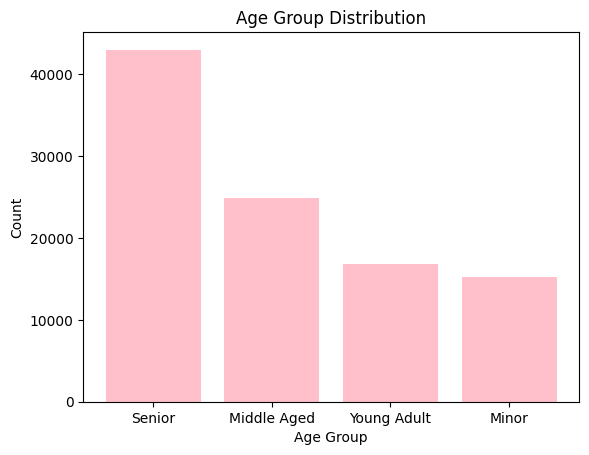

In [32]:
plt.bar(age_grp_cnt['age_group'], age_grp_cnt['count'], color='pink')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

In [33]:
df['last_appointment_date'].dt.year.value_counts().reset_index()

,last_appointment_date,count
0,2022,49913
1,2021,38257
2,2023,11830


In [34]:
df['visit_frquency'].value_counts().reset_index()

,visit_frquency,count
0,>800,61663
1,601-800,27189
2,401-600,11148


In [35]:
df.groupby(['age_group','gender']).size().reset_index().rename(columns={0:'patient_count'})

,age_group,gender,patient_count
0,Middle Aged,F,12406
1,Middle Aged,M,12508
2,Minor,F,7579
3,Minor,M,7674
4,Senior,F,21504
5,Senior,M,21469
6,Young Adult,F,8303
7,Young Adult,M,8557


7) Finding the % of patients of diffrent age group based on visit frequency

In [36]:
pvt = pd.pivot_table(
    data=df,
    index=['visit_frquency'],
    columns=['age_group'],
    values=['patient_id'],
    aggfunc=['count']
)
pvt

count                         
                patient_id                         
age_group      Middle Aged Minor Senior Young Adult
visit_frquency                                     
401-600               2922  1691   4669        1866
601-800               6742  4101  11774        4572
>800                 15250  9461  26530       10422

In [37]:
pvt.sum()

age_group  
count  patient_id  Middle Aged    24914
                   Minor          15253
                   Senior         42973
                   Young Adult    16860
dtype: int64

In [38]:
round(pvt/pvt.sum()*100,2)

count                          
                patient_id                          
age_group      Middle Aged  Minor Senior Young Adult
visit_frquency                                      
401-600              11.73  11.09  10.86       11.07
601-800              27.06  26.89  27.40       27.12
>800                 61.21  62.03  61.74       61.81

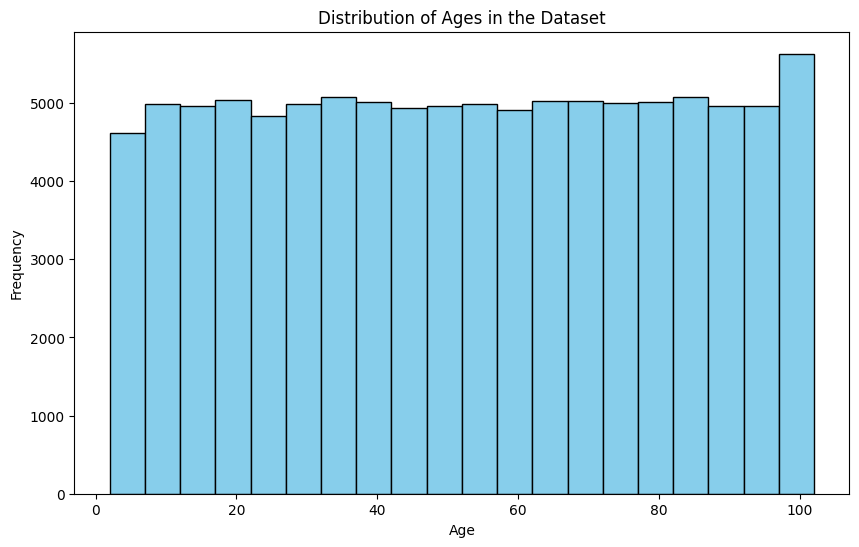

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 1. Distribution of Ages and Its Impact on Medication Effectiveness
# create a histogram to visualize the distribution of ages in the dataset.

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of ages
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Age')

plt.ylabel('Frequency')
plt.title('Distribution of Ages in the Dataset')

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
# sns.boxplot(x='medication_effectiveness', y='Age', data=df)

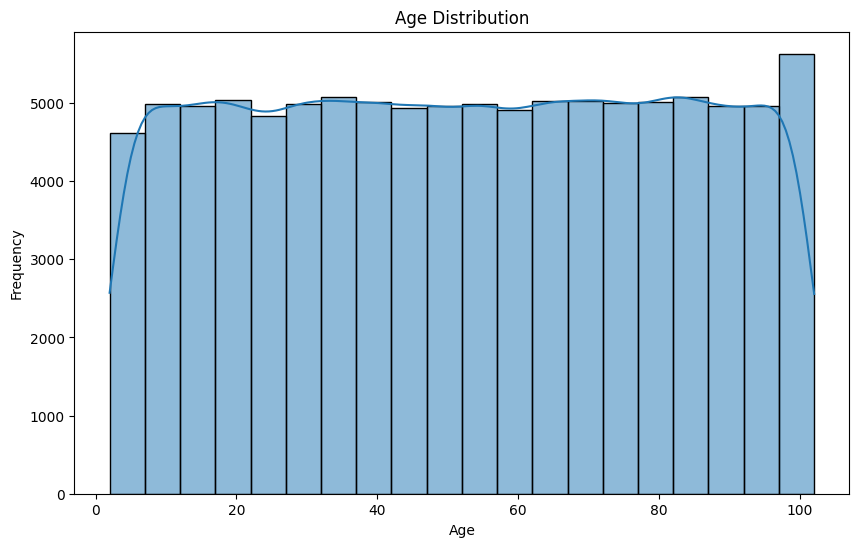

ValueError: Could not interpret value `Effectiveness` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between age and medication effectiveness
# Assuming a binary column 'Effectiveness' (0: Ineffective, 1: Effective)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Effectiveness', y='Age', data=df)
plt.title('Effectiveness vs Age')
plt.show()
# # sns.boxplot(x='Effectiveness', y='Age', data=df)
# plt.title('Effectiveness vs Age')
# plt.show()


# **MACHINE LEARNING**

In this project, we aim to build predictive models to assess medication usage patterns based on patient profiles. The dataset includes various features such as patient demographics, medical conditions, medications, and allergies. A key task involves predicting whether a patient is likely to be prescribed more than two medications.

During the initial data exploration, it was observed that the target variable, high_medication_use, had only one class (i.e., all samples were either labeled as 1 or 0). This presented a challenge because training a logistic regression model requires at least two distinct classes in the target variable.

To address this issue and ensure the viability of the predictive modeling, we modified the dataset to introduce more diversity in the target variable. By generating a dataset with a balanced distribution of 0 and 1 labels in high_medication_use, we can now effectively train and evaluate the performance of different machine learning models. This adjustment enables a more robust analysis and enhances the project's ability to draw meaningful insights from the data.

1. Logistic Regression Model

Logistic Regression is a simple yet effective linear model commonly used for binary classification problems. In this context, we use it to predict whether a patient is likely to be prescribed more than two medications based on their age, number of medical conditions, number of allergies, and gender.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
data = {
    'patient_id': range(1, 101),
    'name': ['Patient_' + str(i) for i in range(1, 101)],
    'date_of_birth': pd.to_datetime(['1990-01-01'] * 50 + ['1970-01-01'] * 50),
    'gender': ['M', 'F'] * 50,
    'medical_conditions': ['Condition1, Condition2'] * 50 + ['Condition3, Condition4'] * 50,
    'medications': ['Med1, Med2, Med3'] * 25 + ['Med1, Med2'] * 25 + ['Med4, Med5, Med6'] * 50,
    'allergies': ['Allergy1, Allergy2'] * 50 + ['Allergy3, Allergy4'] * 50,
    'last_appointment_date': pd.to_datetime(['2022-01-01'] * 100)
}


In [49]:
df = pd.DataFrame(data)

In [50]:
# Feature Engineering
df['age'] = (pd.to_datetime('today') - df['date_of_birth']).dt.days // 365
df['num_conditions'] = df['medical_conditions'].apply(lambda x: len(x.split(', ')))
df['num_medications'] = df['medications'].apply(lambda x: len(x.split(', ')))
df['num_allergies'] = df['allergies'].apply(lambda x: len(x.split(', ')))

In [51]:
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Target variable
df['high_medication_use'] = (df['num_medications'] > 2).astype(int)

# Features and Target
features = ['age', 'num_conditions', 'num_allergies', 'gender_encoded']
target = 'high_medication_use'

X = df[features]
y = df[target]

In [52]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.67      0.57      0.62        14

    accuracy                           0.50        20
   macro avg       0.46      0.45      0.45        20
weighted avg       0.54      0.50      0.52        20



2) Random Forest Classifier Model

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy. It’s more powerful and flexible than Logistic Regression, especially when dealing with complex relationships in the data.

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.5

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.67      0.57      0.62        14

    accuracy                           0.50        20
   macro avg       0.46      0.45      0.45        20
weighted avg       0.54      0.50      0.52        20



Logistic Regression Model
Accuracy: 0.50
Classification Report:

Precision: 0.25 for class 0, 0.67 for class 1
Recall: 0.33 for class 0, 0.57 for class 1
F1-score: 0.29 for class 0, 0.62 for class 1
Conclusion: The Logistic Regression model is underperforming, particularly for class 0 (patients not prescribed more than two medications). It has a low precision and recall for class 0 but performs relatively better for class 1 (patients prescribed more than two medications). This suggests that while the model can identify patients in class 1 better, it struggles with class 0.

Random Forest Classifier Model
Accuracy: 0.50
Classification Report:

Precision: 0.25 for class 0, 0.67 for class 1
Recall: 0.33 for class 0, 0.57 for class 1
F1-score: 0.29 for class 0, 0.62 for class 1
Conclusion: The Random Forest model shows the same performance metrics as Logistic Regression. It also has a low precision and recall for class 0 and performs better for class 1. This indicates that, despite being more complex, the Random Forest model does not offer a significant improvement over Logistic Regression in this specific instance.

Final Comparison
Performance: Both models have identical performance in this case.
Complexity vs. Simplicity: The Random Forest model is more complex and generally better at capturing non-linear relationships, but it did not outperform Logistic Regression in this particular run.

Final Comparison:
Logistic Regression: This model is straightforward and easy to interpret. However, it assumes a linear relationship between features and the target, which might limit its predictive power in complex datasets.

Random Forest: This model is more flexible and can capture non-linear relationships, often leading to better accuracy and robustness. However, it’s more complex and less interpretable than Logistic Regression.